# PORTFOLIO

## 1.EXTRACCION DATASETS INDICES ETFS

In [1]:
# Importing Libraries

# Data handling and statistical analysis 
import pandas as pd
from pandas_datareader import data
import numpy as np
from scipy import stats

# Data visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Optimization and allocation
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import black_litterman, BlackLittermanModel
from pytz import timezone

# Financial data 
import quantstats as qs
import ta
import yfinance as yf

# Linear Regression Model
from sklearn.linear_model import LinearRegression

In [2]:
jepi_data=yf.Ticker('JEPI')

In [3]:

#1   fecha_inicial, la cual podemos modificar a nuestro antojo
fecha_inicial = '2024-01-01'

#2   fecha_final, la cual podemos modificar a nuestro antojo
fecha_final = '2024-07-10'

In [4]:
jepi_df=jepi_data.history(start=fecha_inicial, end=fecha_final)
jepi_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2024-01-02 00:00:00-05:00,52.047919,52.285018,52.028951,52.275532,4294300,0.0,0.0,0.0
2024-01-03 00:00:00-05:00,52.247083,52.256565,51.981533,51.981533,3541300,0.0,0.0,0.0
2024-01-04 00:00:00-05:00,52.019468,52.217682,51.953080,51.962566,4056300,0.0,0.0,0.0
2024-01-05 00:00:00-05:00,51.943598,52.133277,51.803236,51.924629,3982500,0.0,0.0,0.0
2024-01-08 00:00:00-05:00,51.953077,52.275532,51.926522,52.275532,3498700,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-07-02 00:00:00-04:00,55.084193,55.226568,55.035099,55.182384,2785100,0.0,0.0,0.0
2024-07-03 00:00:00-04:00,55.280573,55.305122,55.103832,55.123470,2345800,0.0,0.0,0.0
2024-07-05 00:00:00-04:00,55.182386,55.359127,55.054739,55.359127,2848800,0.0,0.0,0.0


In [5]:
jepi_df.index = jepi_df.index.strftime('%Y-%m-%d')

In [6]:
jepi_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2024-01-02,52.047919,52.285018,52.028951,52.275532,4294300,0.0,0.0,0.0
2024-01-03,52.247083,52.256565,51.981533,51.981533,3541300,0.0,0.0,0.0
2024-01-04,52.019468,52.217682,51.953080,51.962566,4056300,0.0,0.0,0.0
2024-01-05,51.943598,52.133277,51.803236,51.924629,3982500,0.0,0.0,0.0
2024-01-08,51.953077,52.275532,51.926522,52.275532,3498700,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-07-02,55.084193,55.226568,55.035099,55.182384,2785100,0.0,0.0,0.0
2024-07-03,55.280573,55.305122,55.103832,55.123470,2345800,0.0,0.0,0.0
2024-07-05,55.182386,55.359127,55.054739,55.359127,2848800,0.0,0.0,0.0


In [7]:
jepi=qs.utils.download_returns('JEPI')
jepi=jepi.loc[fecha_inicial:fecha_final]
jepi

Date
2024-01-02    0.002546
2024-01-03   -0.005624
2024-01-04   -0.000365
2024-01-05   -0.000730
2024-01-08    0.006758
                ...   
2024-07-03   -0.001068
2024-07-05    0.004275
2024-07-08   -0.002483
2024-07-09   -0.001956
2024-07-10    0.001960
Name: Close, Length: 131, dtype: float64

In [8]:
jepi=yf.download('JEPI', start=fecha_inicial, end=fecha_final, interval='1d')
sp=yf.download('QQQ', start=fecha_inicial, end=fecha_final, interval='1d')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
jepi=jepi.asfreq('B').dropna()
sp=sp.asfreq('B').dropna()


In [10]:
daily_jepi=jepi['Adj Close'].pct_change().dropna()
sp_daily=sp['Adj Close'].pct_change().dropna()


<Figure size 1000x600 with 0 Axes>

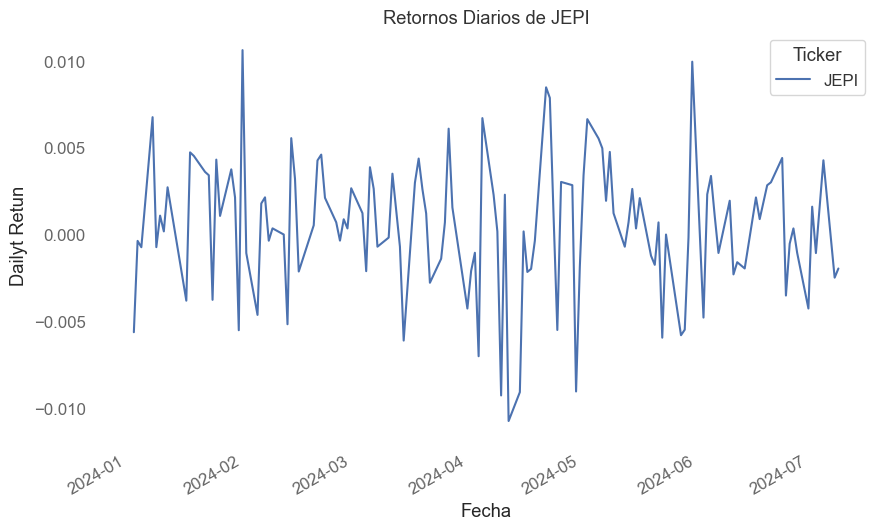

In [11]:
plt.figure(figsize=(10,6))
daily_jepi.plot(title='Retornos Diarios de JEPI')
plt.xlabel('Fecha')
plt.ylabel('Dailyt Retun')
plt.grid()
plt.show()

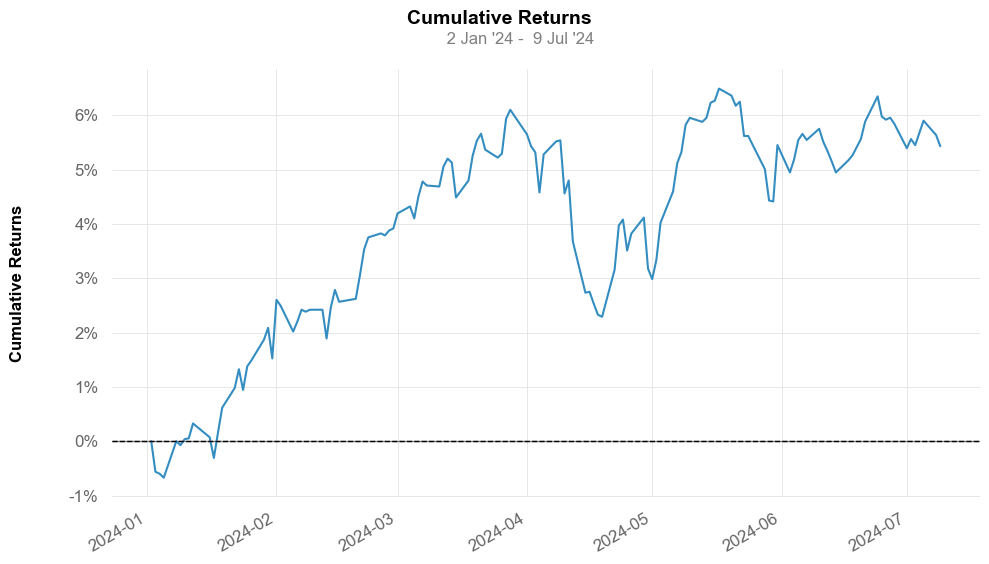

In [12]:
qs.plots.returns(jepi['Adj Close'])

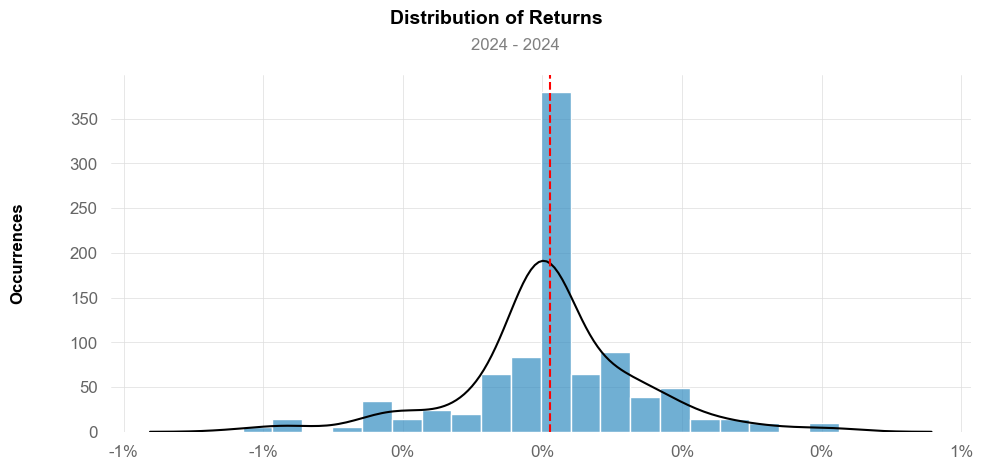

In [13]:
qs.plots.histogram(jepi['Adj Close'],resample='D')

Vamos a observar si hay relación entre el stf benchmark del SP500 y el propio etf JEPI que básicamente tira corto, largos y otro tipos de opciones en el propio SP500. Al mirar la relación; podría ser interesante calibrar una cartera de ambos etfs para adapatarse a corto y largo plazo a los movimientos del mercado.

In [14]:
df_merged=pd.concat([daily_jepi,sp_daily], join='outer', axis=1)
df_merged

Ticker,JEPI,QQQ
Date,,
2024-01-03 00:00:00+00:00,-0.005624,-0.010582
2024-01-04 00:00:00+00:00,-0.000365,-0.005146
2024-01-05 00:00:00+00:00,-0.000730,0.001186
2024-01-08 00:00:00+00:00,0.006758,0.020668
2024-01-09 00:00:00+00:00,-0.000726,0.001976
...,...,...
2024-07-02 00:00:00+00:00,0.001604,0.010500
2024-07-03 00:00:00+00:00,-0.001068,0.008337
2024-07-05 00:00:00+00:00,0.004275,0.010427


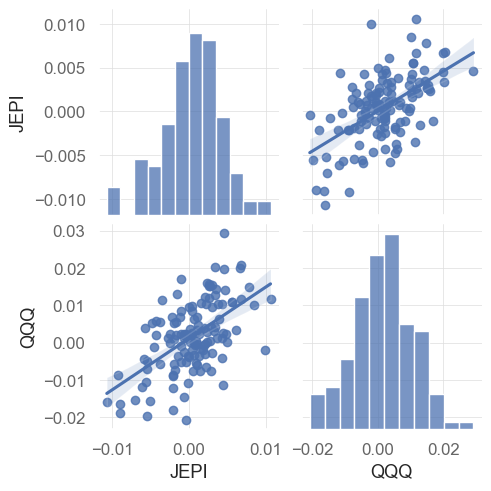

In [15]:
sns.pairplot(df_merged, kind='reg')
plt.show()

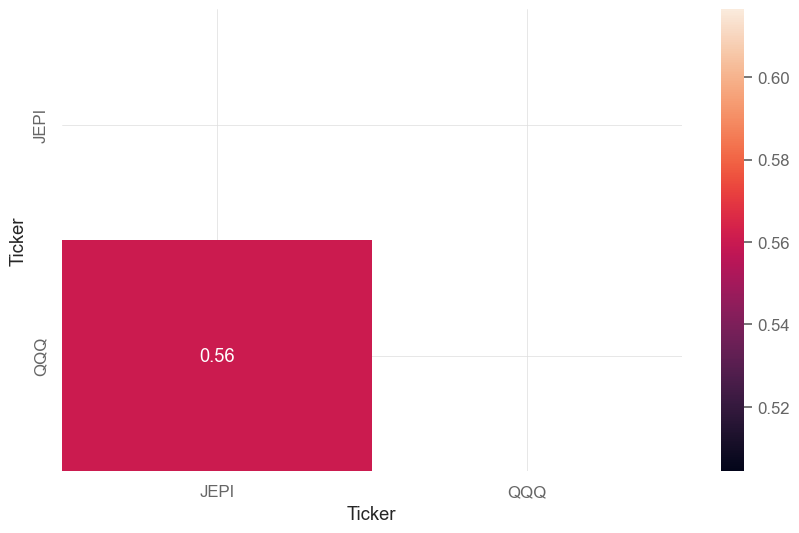

In [16]:
corr=df_merged.corr()
mask=np.zeros_like(corr,dtype=bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr, annot=True, mask=mask)
plt.show()

Al ser JEPI más especulativo, la relación lineal entre ambos no es lo suficientemente fuerte

In [17]:
daily_jepi_noId=daily_jepi.reset_index(drop=True)
daily_jepi_noId

Ticker,JEPI
0,-0.005624
1,-0.000365
2,-0.000730
3,0.006758
4,-0.000726
...,...
124,0.001604
125,-0.001068
126,0.004275
127,-0.002483


In [18]:
sp_daily_noId=sp_daily.reset_index(drop=True)
sp_daily_noId

Ticker,QQQ
0,-0.010582
1,-0.005146
2,0.001186
3,0.020668
4,0.001976
...,...
124,0.010500
125,0.008337
126,0.010427
127,0.002378


In [19]:
X=sp_daily_noId.values
y=daily_jepi_noId.values

linreg=LinearRegression().fit(X,y)

beta=linreg.coef_[0]
alpha=linreg.intercept_

print(f'JEPI beta: {beta}')
print(f'JEPI alpha: {alpha}')

JEPI beta: [0.22874871]
JEPI alpha: [2.54270292e-05]


- La beta de JEPI es muy inferior a 1, indicando baja volatilidad y bajas ganancias (no se tiene en cuenta el dividendo mensual que entrega)
- Por otra parte el alpha es prácticamente 0, con lo que hay pocaa diferencia entre los retornos experados y su riesgo.

## Ratio Sharpe

In [20]:
print(' Sharpe ratio JEPI:', qs.stats.sharpe(daily_jepi))
print(' Sharpe ratio QQQ:', qs.stats.sharpe(sp_daily))

 Sharpe ratio JEPI: Ticker
JEPI    1.728463
dtype: float64
 Sharpe ratio QQQ: Ticker
QQQ    2.896296
dtype: float64


Tienen muy buena relación riesgo beneficio ambos ETFs

## Generación de portafolios

In [21]:
daily_jepi

Ticker,JEPI
Date,
2024-01-03 00:00:00+00:00,-0.005624
2024-01-04 00:00:00+00:00,-0.000365
2024-01-05 00:00:00+00:00,-0.000730
2024-01-08 00:00:00+00:00,0.006758
2024-01-09 00:00:00+00:00,-0.000726
...,...
2024-07-02 00:00:00+00:00,0.001604
2024-07-03 00:00:00+00:00,-0.001068
2024-07-05 00:00:00+00:00,0.004275


In [22]:
weights=[0.5,0.5]
portfolio = daily_jepi['JEPI']*weights[0] + sp_daily['QQQ']*weights[1]
portfolio=pd.DataFrame(portfolio)
portfolio.columns=['JEPI+QQQ']


In [23]:
sp_daily

Ticker,QQQ
Date,
2024-01-03 00:00:00+00:00,-0.010582
2024-01-04 00:00:00+00:00,-0.005146
2024-01-05 00:00:00+00:00,0.001186
2024-01-08 00:00:00+00:00,0.020668
2024-01-09 00:00:00+00:00,0.001976
...,...
2024-07-02 00:00:00+00:00,0.010500
2024-07-03 00:00:00+00:00,0.008337
2024-07-05 00:00:00+00:00,0.010427
